In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn           as sns

In [3]:
cs = pd.read_csv('D:\Imarticus\Python\Data Set\Diwali HW Customer_Shopping\customer_shopping_data.csv')

In [37]:
cs.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall,age_group,total_spent
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,05-08-2022,Kanyon,26–35,7502.00
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12-12-2021,Forum Istanbul,18–25,5401.53
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,09-11-2021,Metrocity,18–25,300.08
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16-05-2021,Metropol AVM,66–70,15004.25
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24-10-2021,Kanyon,46–55,242.40


In [5]:
cs.isnull().sum()[cs.isnull().sum() > 0]

Series([], dtype: int64)

In [6]:
cs.shopping_mall.unique()

array(['Kanyon', 'Forum Istanbul', 'Metrocity', 'Metropol AVM',
       'Istinye Park', 'Mall of Istanbul', 'Emaar Square Mall',
       'Cevahir AVM', 'Viaport Outlet', 'Zorlu Center'], dtype=object)

In [7]:
cs.category.unique()

array(['Clothing', 'Shoes', 'Books', 'Cosmetics', 'Food & Beverage',
       'Toys', 'Technology', 'Souvenir'], dtype=object)

In [8]:
# cs.shopping_mall.

In [49]:
mall = pd.crosstab(cs['category'], cs['shopping_mall'])
mall

shopping_mall,Cevahir AVM,Emaar Square Mall,Forum Istanbul,Istinye Park,Kanyon,Mall of Istanbul,Metrocity,Metropol AVM,Viaport Outlet,Zorlu Center
category,,,,,,,,,,
Books,258,236,252,462,1013,1025,752,476,246,261
Clothing,1729,1651,1729,3353,6840,6923,5268,3525,1708,1761
Cosmetics,732,760,770,1458,3023,3050,2265,1541,734,764
Food & Beverage,772,692,712,1490,2909,2957,2244,1517,733,750
Shoes,490,498,458,1001,2017,2023,1457,1074,497,519
Souvenir,240,247,261,515,1037,948,738,531,225,257
Technology,256,263,234,487,997,1017,772,464,256,250
Toys,514,464,531,1015,1987,2000,1515,1033,515,513


In [10]:
                                          # Q1 which gender is buying more



In [11]:
gen = pd.DataFrame(cs.groupby(['gender']).quantity.sum())
gen

,quantity
gender,
Female,178659
Male,120053


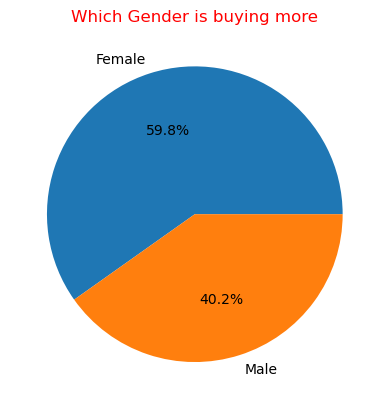

In [12]:
plt.pie(gen.quantity , labels = gen.index, autopct = '%1.1f%%')
plt.title('Which Gender is buying more', color = 'red');

In [13]:
# gender = pd.crosstab(cs['category'], cs['gender'])
# gender

# plt.figure(figsize=(15,10))
# gender.plot(kind = 'bar')
# plt.title('Gender relation wrt Category', size = 15, color = 'red')
# plt.ylabel('Gender count', size = 15 , color = 'green')
# plt.xlabel('Categorry', size = 15, color = 'green');

In [14]:


                                    # Q2 which mall has maximum sale


In [15]:
max_sell = pd.DataFrame(cs.groupby(['shopping_mall']).quantity.sum())
max_sell

,quantity
shopping_mall,
Cevahir AVM,14949
Emaar Square Mall,14501
Forum Istanbul,14852
Istinye Park,29465
Kanyon,59457
Mall of Istanbul,60114
Metrocity,44894
Metropol AVM,30530
Viaport Outlet,14716


In [16]:
color_list = []
for i in max_sell.quantity:
    if i >= 50000:
        color_list.append('green')
    elif i >= 30000 and i < 50000:
        color_list.append('blue')
    else:
        color_list.append('red')

Text(0.5, 0, 'Mall')

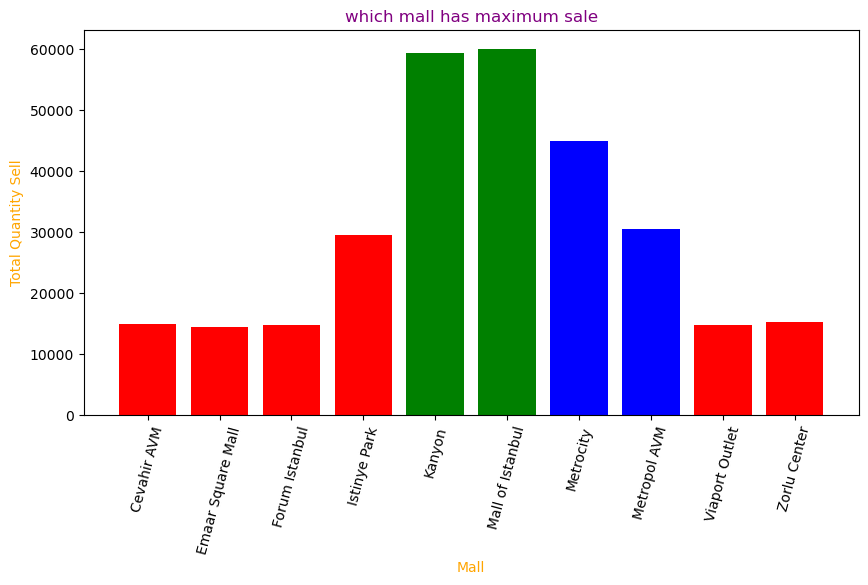

In [17]:
plt.figure(figsize = (10,5))
plt.title('which mall has maximum sale', color = 'purple')
plt.bar(max_sell.index, max_sell.quantity, color = color_list)
plt.xticks(rotation = 75)
plt.ylabel('Total Quantity Sell', color = 'orange')
plt.xlabel('Mall' , color = 'orange')

In [18]:

                                    # Q3 which Age group buying more and which type of shopping is done


In [19]:
cs.age.unique()

array([28, 21, 20, 66, 53, 49, 32, 69, 60, 36, 29, 67, 25, 24, 65, 42, 46,
       23, 27, 52, 44, 51, 50, 68, 43, 59, 54, 48, 40, 41, 19, 18, 22, 61,
       45, 64, 33, 63, 34, 47, 38, 57, 30, 26, 62, 39, 55, 56, 35, 31, 37,
       58])

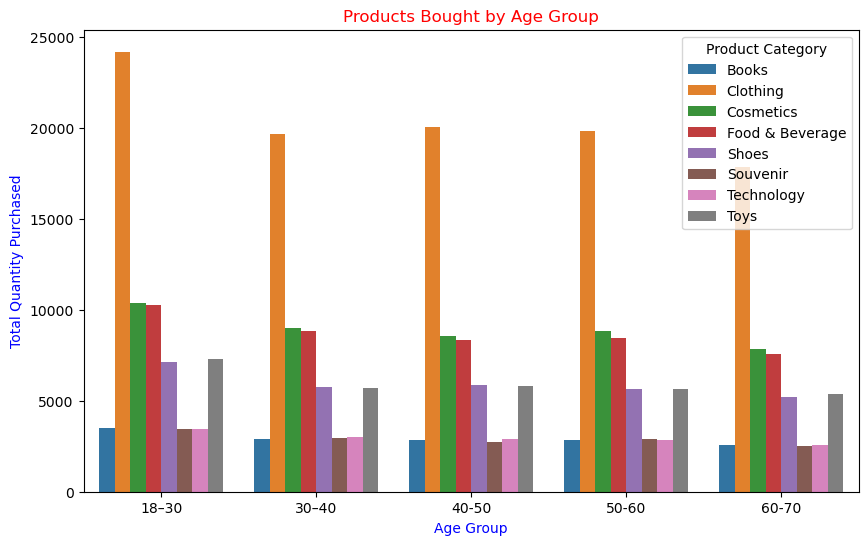

In [41]:
bins = [18, 30, 40, 50, 60, 70]
labels = ['18–30', '30–40', '40-50', '50-60', '60-70']
cs['age_group'] = pd.cut(cs['age'], bins=bins, labels=labels)


age_category_sales = cs.groupby(['age_group', 'category'])['quantity'].sum().reset_index()


plt.figure(figsize=(10,6))
sns.barplot(data=age_category_sales, x='age_group', y='quantity', hue='category')
plt.title('Products Bought by Age Group', color = 'red')
plt.xlabel('Age Group' , color = 'blue')
plt.ylabel('Total Quantity Purchased', color = 'blue')
plt.legend(title='Product Category')
plt.show()


In [21]:


                # Q4 which category has higher paying dollar in food or object buying and who is speding more money Male or female



In [22]:
cs['total_spent'] = cs['quantity'] * cs['price']

In [23]:
spending_summary = cs.groupby(['category', 'gender'])['total_spent'].sum().reset_index()
spending_summary

,category,gender,total_spent
0,Books,Female,489314.70
1,Books,Male,345238.20
2,Clothing,Female,68251695.60
3,Clothing,Male,45745095.44
4,Cosmetics,Female,4066772.54
5,Cosmetics,Male,2726090.36
6,Food & Beverage,Female,505322.60
7,Food & Beverage,Male,344212.45
8,Shoes,Female,39425167.30
9,Shoes,Male,27128284.17


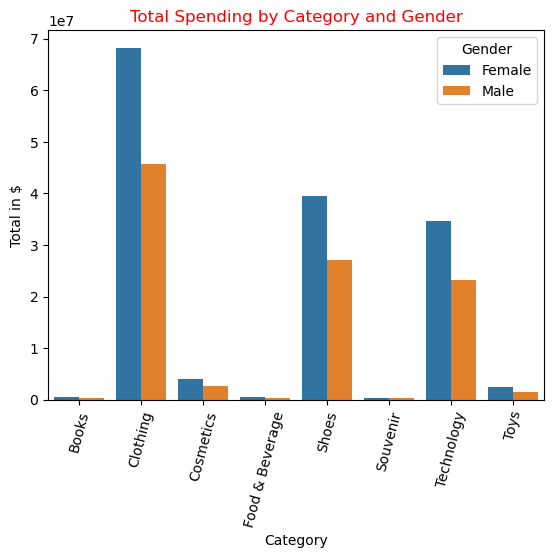

In [57]:
# plt.figure(figsize=(8,6))
sns.barplot(x='category', y='total_spent', hue='gender', data=spending_summary)
plt.title('Total Spending by Category and Gender', color = 'red')
plt.xlabel('Category')
plt.ylabel('Total in $')
plt.legend(title='Gender')
plt.xticks(rotation = 75)
plt.show()

In [25]:


                                        # Q5 If females shop more , do they  spend more check


In [42]:
spending = pd.DataFrame(cs.groupby(['gender']).agg({
    'invoice_no': 'count',  
    'total_spent': 'sum'        
}).reset_index())
spending

,gender,invoice_no,total_spent
0,Female,59482,1.502071e+08
1,Male,39975,1.012987e+08


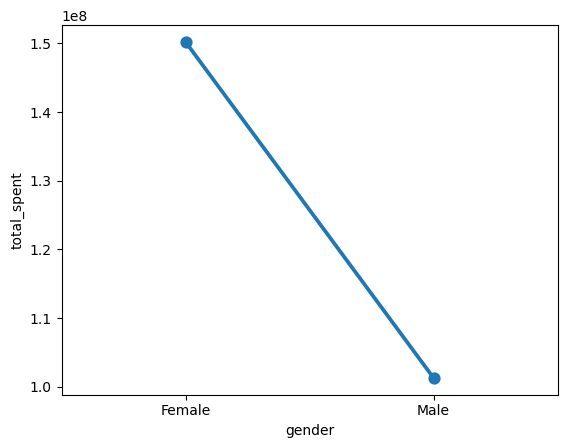

In [34]:
sns.pointplot(x = spending.index, y = spending.total_spent , data = spending);

In [43]:
spending.columns = ['Gender', 'Total_Shops', 'Total_Spent']

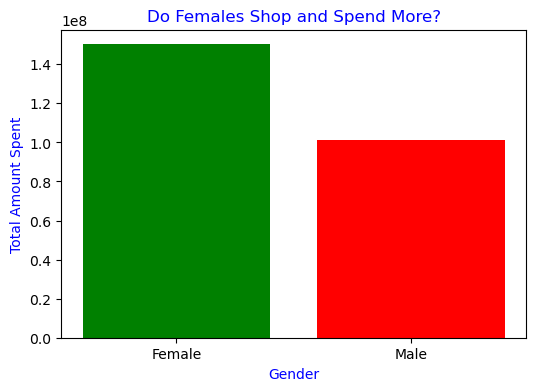

In [47]:
plt.figure(figsize=(6,4))
plt.bar(spending['Gender'], spending['Total_Spent'], color=['green','red'])
plt.title('Do Females Shop and Spend More?', color = 'blue')
plt.xlabel('Gender', color = 'blue')
plt.ylabel('Total Amount Spent', color = 'blue')
plt.show()